<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Deep_learning_material_TU22015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron

In [37]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#データセットをロード
iris = load_iris()
#predictor と target に分ける
X = iris.data
#Iris Setosaが1の値をとり、それ以外は0
Y = (iris.target==0).astype(int)

#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、cross validationを実行、さらにハイパーパラメータの最適化を行う
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3, random_state=42, shuffle=True)

#トレーニング
perc_clf = Perceptron()
perc_clf.fit(train_X,train_Y)

#テスト
predictions = perc_clf.predict(test_X)

#Accuracyを計算
print("Accuracy: " +str(accuracy_score(test_Y,predictions)))

Accuracy: 1.0


Multi Layer Perceptron using Scikit learn

In [38]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#データセットをロード
iris = load_iris()
#predictor と　target に分ける
X = iris.data
Y = iris.target

#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3, random_state=42, shuffle=True)

#二つのHidden Layer を追加、それぞれ10個のニューロンを持つ
mlp_clsf = MLPClassifier((10,10),activation ='relu',learning_rate='constant',learning_rate_init=0.001,max_iter=1000,random_state=42)
mlp_clsf.fit(train_X,train_Y)
predictions = mlp_clsf.predict(test_X)
print("Accuracy: "+str(accuracy_score(test_Y,predictions)))

Accuracy: 0.9777777777777777


In [39]:
#確率の合計が１かを確認
mlp_clsf.predict_proba(test_X[0].reshape(1,-1)).sum()

1.0

Activation Function

In [40]:
mlp_clsf.out_activation_

'softmax'

MLP Regression

In [41]:
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#データセットをロード
dataset = load_boston()
X = dataset['data']
Y = dataset['target']

#テストとトレーニングのデータセットに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3, random_state=42, shuffle=True)

#2個のhidden layerを追加 activation function は relu.
mlp_reg = MLPRegressor((10,10),activation='relu',learning_rate='constant',learning_rate_init=0.001,max_iter=3000,random_state=42)
mlp_reg.fit(train_X,train_Y)
predictions = mlp_reg.predict(test_X)

#RSMEを計算
error = mean_squared_error(test_Y,predictions) ** (1/2)
print("RSME: " +str(error))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

RSME: 4.699377521565086


In [42]:
mlp_reg.out_activation_

'identity'

Regression using Keras

In [43]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#データセットをダウンロード
house_price = keras.datasets.boston_housing
#データをtraining, validation, test に分ける
(train_X, train_Y), (test_X, test_Y) = house_price.load_data()
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)

#変数をスケーリング 最適化を早くするため
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)
test_X = scaler.fit_transform(test_X)

#KerasのSequential model を使う
keras_model = keras.models.Sequential()
#インプットレイヤーを追加
keras_model.add(tf.keras.Input(shape=train_X.shape[1:],))
#Hidden layer を追加
keras_model.add(tf.keras.layers.Dense(30,activation="relu"))
#Output layer を追加
keras_model.add(tf.keras.layers.Dense(1))

keras_model.summary()

#モデルをコンパイル
keras_model.compile(loss="mean_squared_error", optimizer="sgd",metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)])

#モデルをトレーニング
#validationのデータセットがあれば、それを渡すことで、validationに関してのlossやRMSEの計算なども簡単にで
history = keras_model.fit(train_X, train_Y, epochs=70, validation_data=(valid_X, valid_Y))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 1s 19ms/step - loss: 200.1701 - root_mean_squared_error: 14.1481 - val_loss: 45.4412 - val_root_mean_squared_error: 6.7410
Epoch 2/70
10/10 [==============================] - 0s 6ms/step - loss: 21.7584 - root_mean_squared_error: 4.6646 - val_loss: 34.6580 - val_root_mean_squared_error: 5.8871
Epoch 3/70
10/10 [==============================] - 0s 6ms/step - loss: 16.9900 - root_mean_squared_error

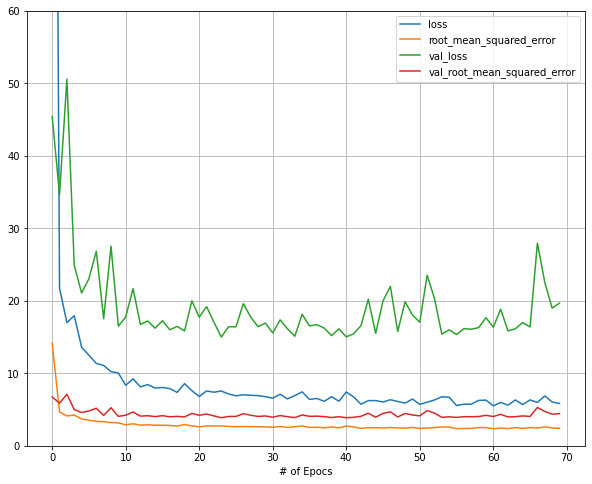

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,60)
plt.xlabel("# of Epocs")
plt.show()

In [45]:
mean_squared_error(test_Y,keras_model.predict(test_X)) ** (1/2)

4.6695230635532745

Classificaiton using Keras

In [46]:
#データをダウンロードして、トレーニングとテストに分ける
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

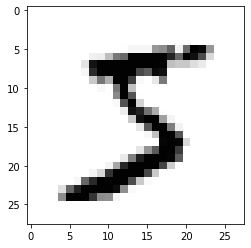

In [47]:
#イメージを実際に視覚化してみる
from matplotlib import pyplot as plt
plt.imshow(train_X[0],cmap='Greys')
plt.show()

In [48]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#training と validationに分ける
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)

#最適化のアルゴリズムを早くするために、変数をスケーリングします。
train_X = train_X / 255.0
valid_X = valid_X / 255.0
test_X = test_X / 255.0

keras_clf = keras.models.Sequential()
#input layerを作る。もともとのinputのデータが2-Dなので、1Dにします。
keras_clf.add(keras.layers.Flatten(input_shape=[28,28]))
#output layer を作る.10個のクラスがあるので、10個のニューロンが必要。
keras_clf.add(keras.layers.Dense(10,activation = 'softmax'))

keras_clf.summary()
keras_clf.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])
history = keras_clf.fit(train_X, train_Y, epochs=20, validation_data=(valid_X, valid_Y))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.8660 - accuracy: 0.7937 - val_loss: 0.5447 - val_accuracy: 0.8720
Epoch 2/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4961 - accuracy: 0.8726 - val_loss: 0.4457 - val_accuracy: 0.8869
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4331 - accuracy: 0.8838 - val_loss: 0.4041 - val_accuracy: 0.8947
Epoch 4/20
1407/

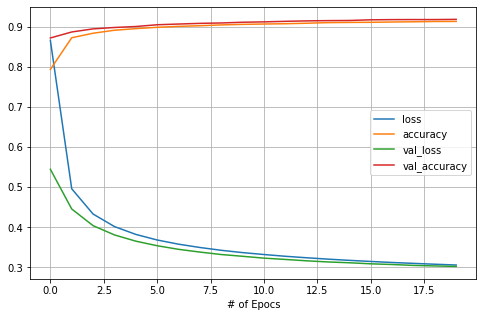

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.xlabel("# of Epocs")
plt.show()

In [50]:
#accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy: " +str(accuracy_score(test_Y,keras_clf.predict(test_X).argmax(axis=-1))))

Accuracy: 0.9173


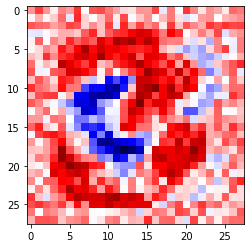

In [51]:
#3のアウトプットノードに関連する重みを全部について、28＊28の2-Dに変換
plt.imshow(np.reshape(keras_clf.get_weights()[0][:,3],(28,28)),cmap="seismic")